### Imporing the necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [2]:
dataset  = pd.read_csv(r'C:\Users\LENOVO\Documents\Untitled Folder\Project-Housing_splitted\train.csv')

## After importing the training dataset, looking at the glimpse of the data

In [3]:
dataset.iloc[:5,:15]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm       Norm  
1         Lvl    AllPub    Inside       Mod        NAmes       Norm       Norm  
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm  
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm  
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm       Norm

In [4]:
dataset.iloc[:5,15:30]

BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   TwnhsE     1Story            6            5       1976          1976   
1     1Fam     1Story            8            6       1970          1970   
2     1Fam     2Story            7            5       1996          1997   
3     1Fam     1Story            6            6       1977          1977   
4     1Fam     1Story            6            7       1977          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     Plywood     Plywood       None         0.0        TA   
1      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2     Gable  CompShg     MetalSd     MetalSd       None         0.0        Gd   
3       Hip  CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4     Gable  CompShg     CemntBd     CmentBd      Stone       126.0        Gd   

  ExterCond Foundation  
0        TA     CBlock  
1        Gd      PConc  
2        TA      PConc  
3        TA     CBlock  
4        TA     CBlock

In [5]:
dataset.iloc[:5,30:45]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          ALQ         120          Unf   
1       TA       Gd           Gd          ALQ         351          Rec   
2       Gd       TA           Av          GLQ         862          Unf   
3       Gd       TA           No          BLQ         705          Unf   
4       Gd       TA           No          ALQ        1246          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        958         1078    GasA        TA          Y      SBrkr   
1         823       1043         2217    GasA        Ex          Y      SBrkr   
2           0        255         1117    GasA        Ex          Y      SBrkr   
3           0       1139         1844    GasA        Ex          Y      SBrkr   
4           0        356         1602    GasA        Gd          Y      SBrkr   

   1stFlrSF  2ndFlrSF  
0       958         0  
1      2217         0  
2      1127       886  
3      1844         0  
4      1602         0

In [6]:
dataset.iloc[:5,45:60]

LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt  
0           1          TA     Attchd       1977.0  
1           1          TA     Attchd       1970.0  
2           1          TA     Attchd       1997.0  
3           1          TA     Attchd       1977.0  
4           1          TA     Attchd       1977.0

In [7]:
dataset.iloc[:5,60:75]

GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455         TA         TA          Y   
3          RFn           2         546         TA         TA          Y   
4          Fin           2         529         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   
2         180          130              0          0            0         0   
3           0          122              0          0            0         0   
4         240            0              0          0            0         0   

  PoolQC  Fence MiscFeature  
0    NaN    NaN         NaN  
1    NaN    NaN         NaN  
2    NaN    NaN         NaN  
3    NaN  MnPrv         NaN  
4    NaN    NaN         NaN

In [8]:
dataset.iloc[:5,75:]

MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0        0       2    2007       WD        Normal     128000
1        0      10    2007       WD        Normal     268000
2        0       6    2007       WD        Normal     269790
3        0       1    2010      COD        Normal     190000
4        0       6    2009       WD        Normal     215000

In [9]:
dataset.shape

(1168, 81)

### There are 1168 rows and 81 columns in the training dataset

### Checking for the missing data

In [10]:
pd.set_option('display.max_rows',None)
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Checking for the relationship to impute the missing variable

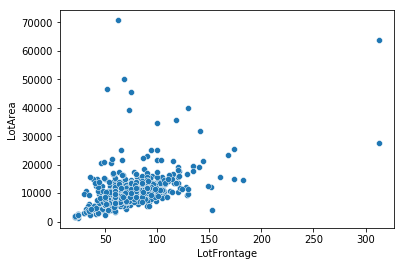

In [11]:
sns.scatterplot(x = 'LotFrontage', y = 'LotArea', data = dataset )

### Using the KNN Imputer to impute LotFrontage

In [12]:
knim = KNNImputer()
dataset[['LotFrontage','LotArea']] = knim.fit_transform(dataset[['LotFrontage','LotArea']])

In [13]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])

In [14]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

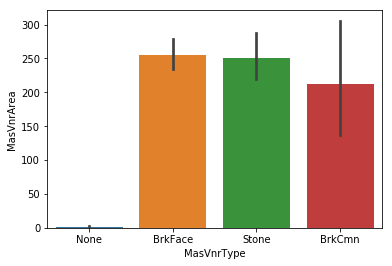

In [15]:
sns.barplot(x ='MasVnrType',y = 'MasVnrArea', data = dataset)

In [16]:
dataset['MasVnrArea'].describe()

count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

### Imputing the rest of the missing data

In [17]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [18]:
dataset['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [19]:
dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NA')
dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NA')
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NA')
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NA')
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NA')

In [20]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')

In [21]:
dataset['GarageType'] = dataset['GarageType'].fillna('NA')
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NA')
dataset['GarageQual'] = dataset['GarageQual'].fillna('NA')
dataset['GarageCond'] = dataset['GarageCond'].fillna('NA')

In [22]:
dataset['Fence'] = dataset['Fence'].fillna('NA')

### Removing the variables from the dataset which have more then 80% missing data for ex: 'Alley','MiscFeature','PoolQC','Id'

In [23]:
data = dataset.drop(columns = ['Alley','MiscFeature','PoolQC','Id'])

### using ordinal Encoder to encode the categorical data

In [24]:
encoder = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = encoder.fit_transform(data[i].values.reshape(-1,1))

### Check for the data correlation on the dependent variable with the independent variables

In [25]:
data_corr = data.corr()
data_corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.319416
WoodDeckSF       0.315444
HalfBath         0.295592
GarageYrBlt      0.265622
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
GarageQual       0.192392
RoofMatl         0.159865
BedroomAbvGr     0.158281
Fence            0.143922
Functional       0.118673
ExterCond        0.115167
Exterior1st 

In [26]:
print("Highly Correlated variables with the SalePrice\n",
"""OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.319416
WoodDeckSF       0.315444
HalfBath         0.295592
GarageYrBlt      0.265622
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
LotShape        -0.248171
BsmtExposure    -0.267635
HeatingQC       -0.406604
GarageType      -0.415370
GarageFinish    -0.424922
KitchenQual     -0.592468
BsmtQual        -0.601307
ExterQual       -0.624820""")

Highly Correlated variables with the SalePrice
 OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.319416
WoodDeckSF       0.315444
HalfBath         0.295592
GarageYrBlt      0.265622
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
LotShape        -0.248171
BsmtExposure    -0.267635
HeatingQC       -0.406604
GarageType      -0.415370
GarageFinish    -0.424922
KitchenQual     -0.592468
BsmtQual        -0.601307
ExterQual       -0.624820


### Visualizing the highly correlated variables with the target variable

Text(0, 0.5, 'SalePrice')

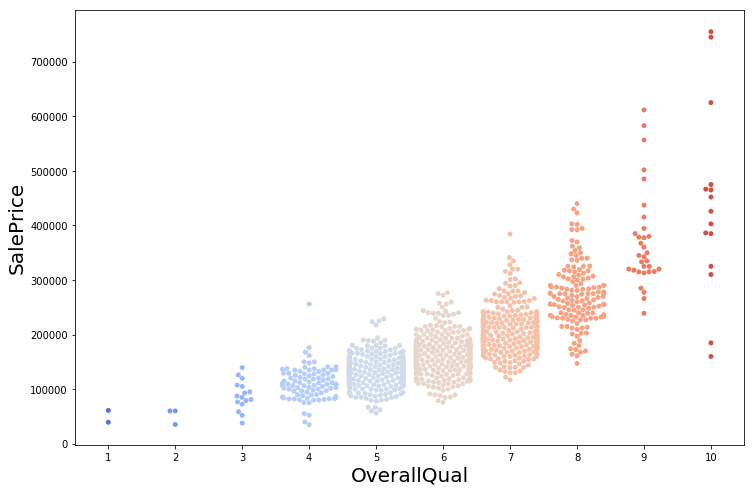

In [27]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'OverallQual',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('OverallQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

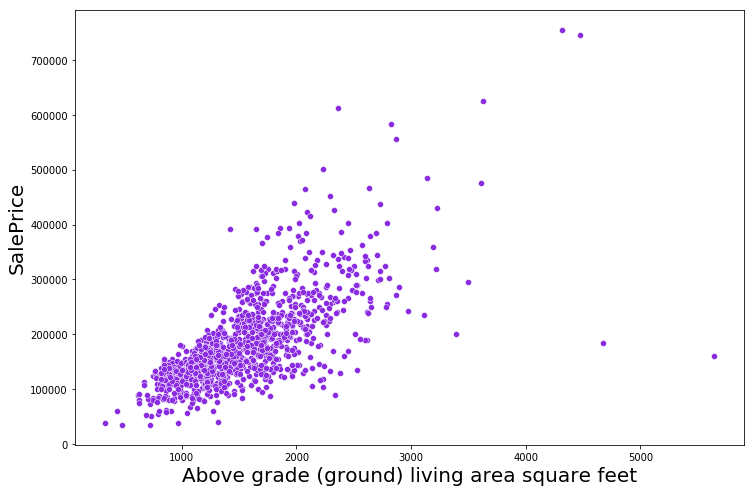

In [28]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'GrLivArea',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Above grade (ground) living area square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

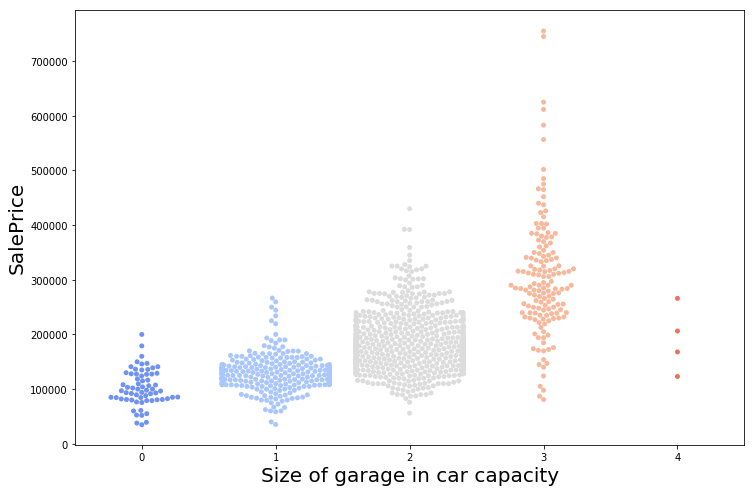

In [29]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageCars',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Size of garage in car capacity', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

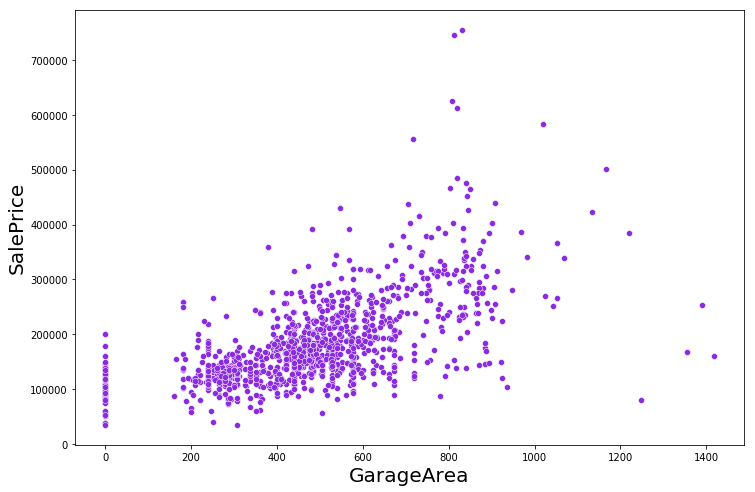

In [30]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'GarageArea',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('GarageArea', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

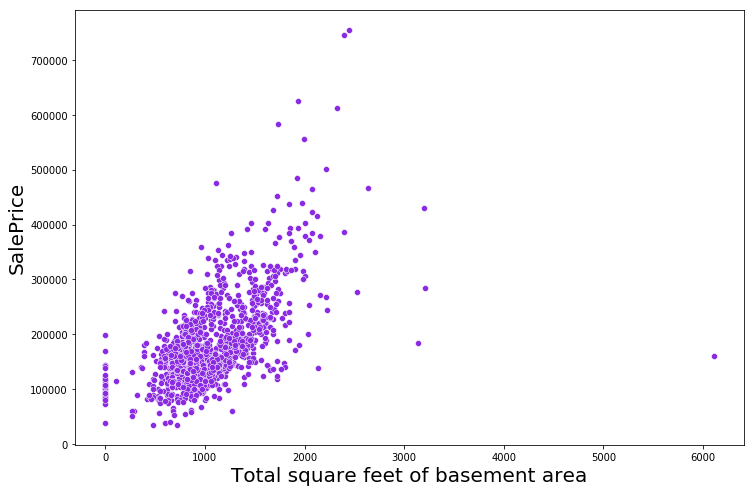

In [31]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'TotalBsmtSF',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Total square feet of basement area', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

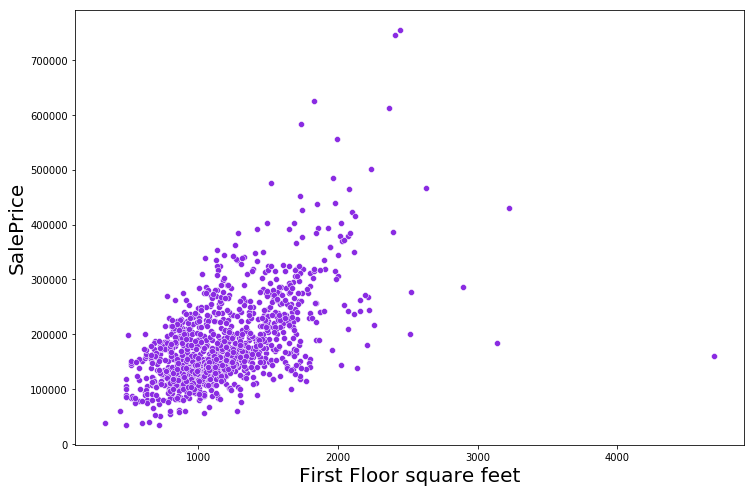

In [32]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = '1stFlrSF',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('First Floor square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

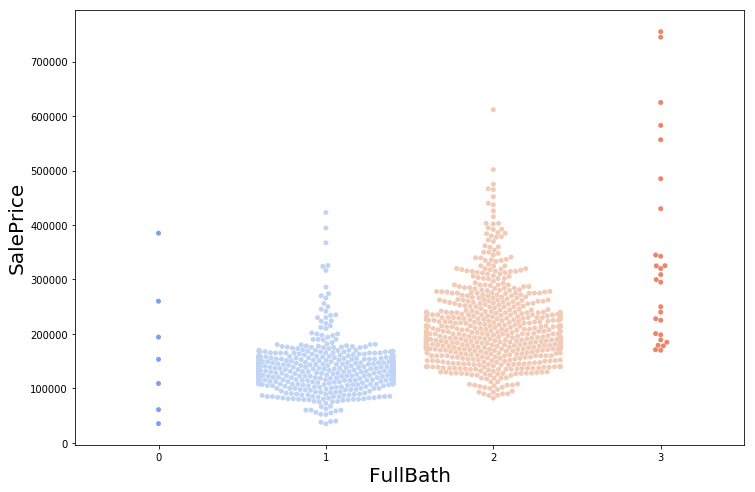

In [33]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'FullBath',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('FullBath', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

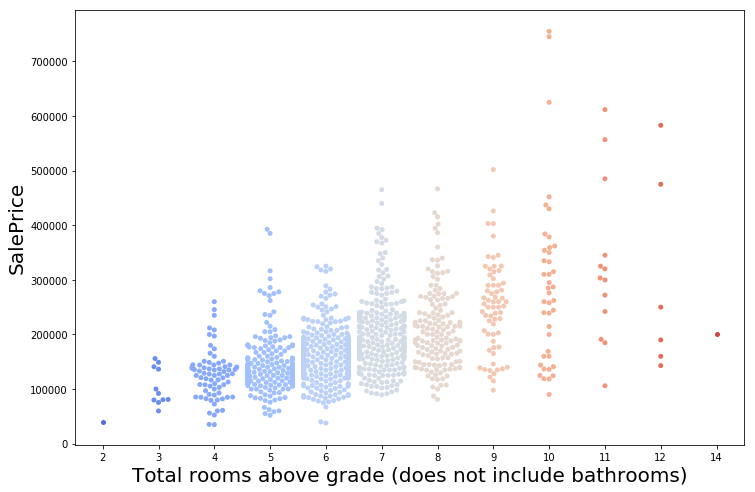

In [34]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'TotRmsAbvGrd',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Total rooms above grade (does not include bathrooms)', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

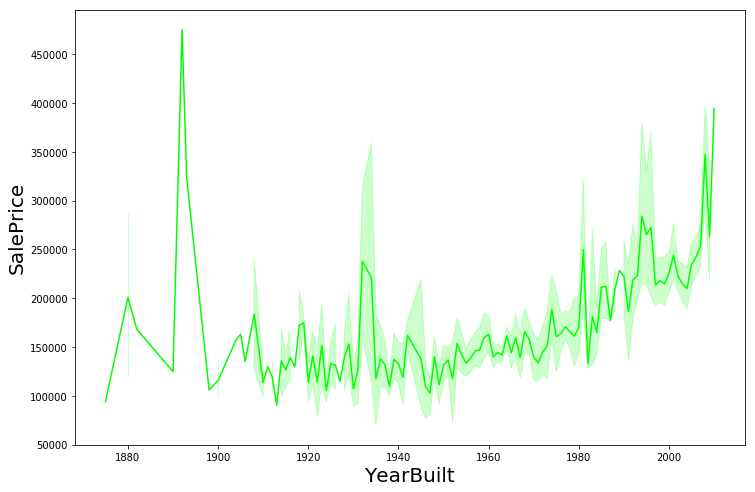

In [35]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'YearBuilt',y = 'SalePrice', data = dataset, color = 'lime')
plt.xlabel('YearBuilt', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

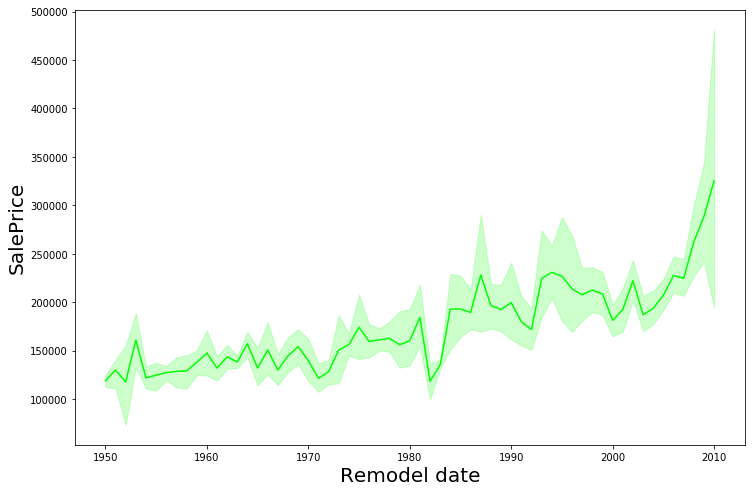

In [36]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'YearRemodAdd',y = 'SalePrice', data = dataset, color = 'lime')
plt.xlabel('Remodel date', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

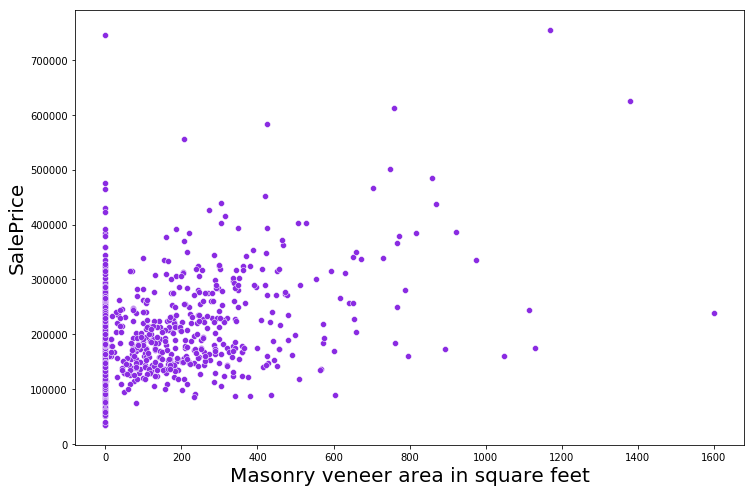

In [37]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'MasVnrArea',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Masonry veneer area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

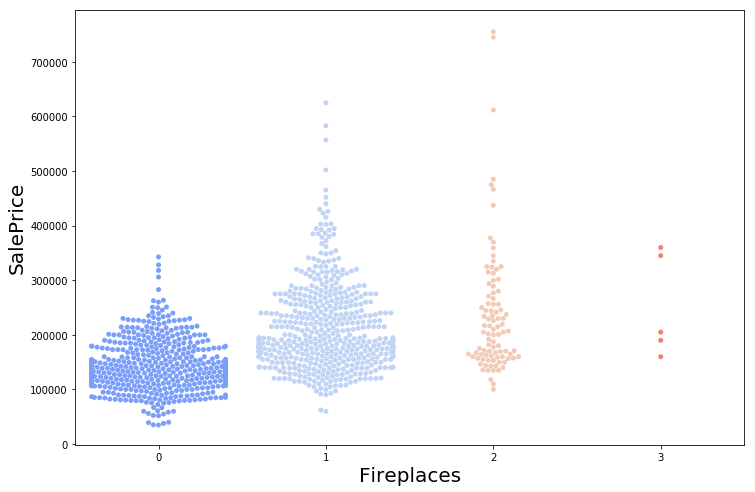

In [38]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'Fireplaces',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Fireplaces', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

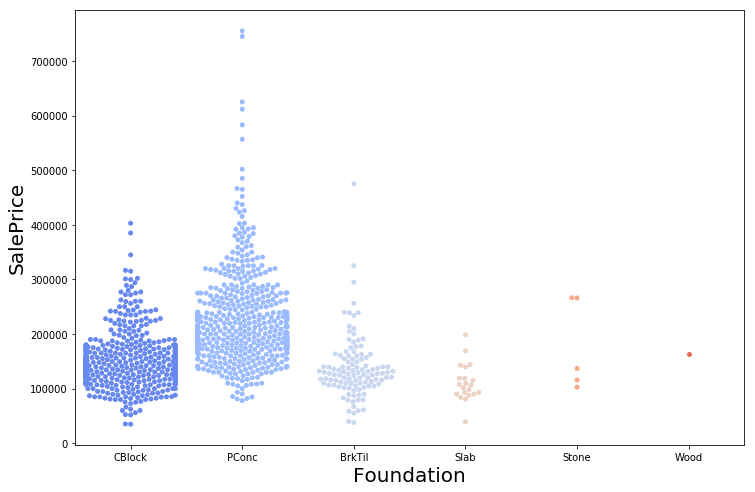

In [39]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'Foundation',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Foundation', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

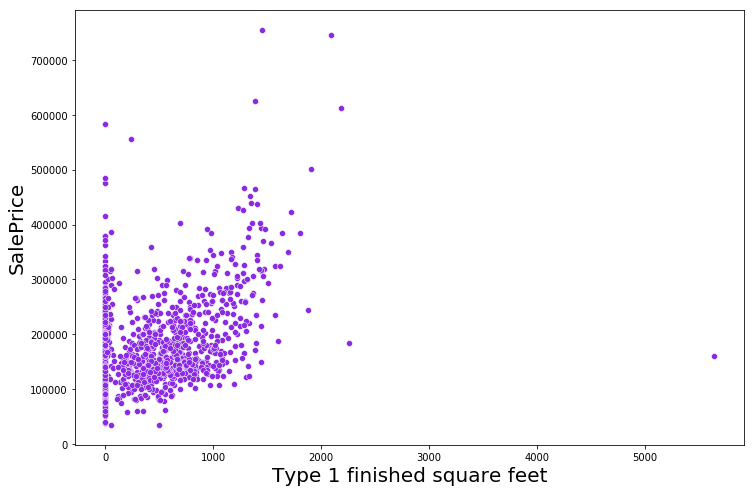

In [40]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'BsmtFinSF1',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Type 1 finished square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

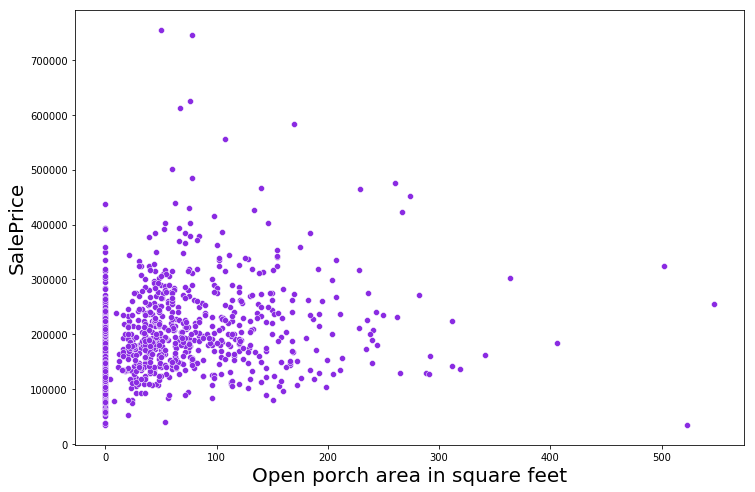

In [41]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'OpenPorchSF',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Open porch area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

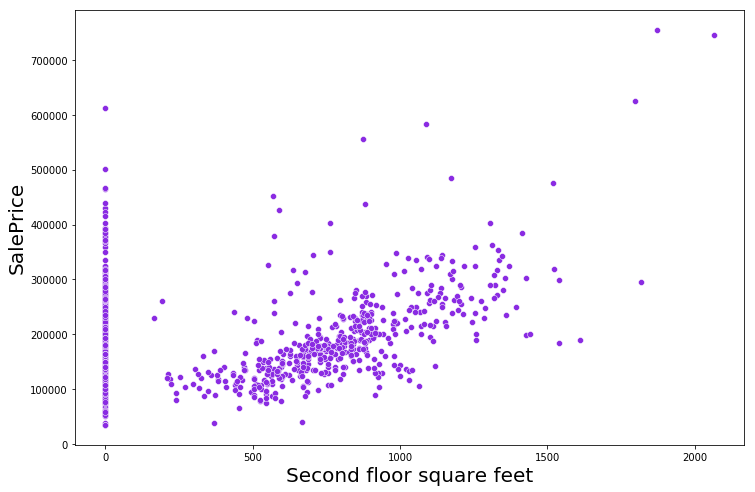

In [42]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = '2ndFlrSF',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Second floor square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

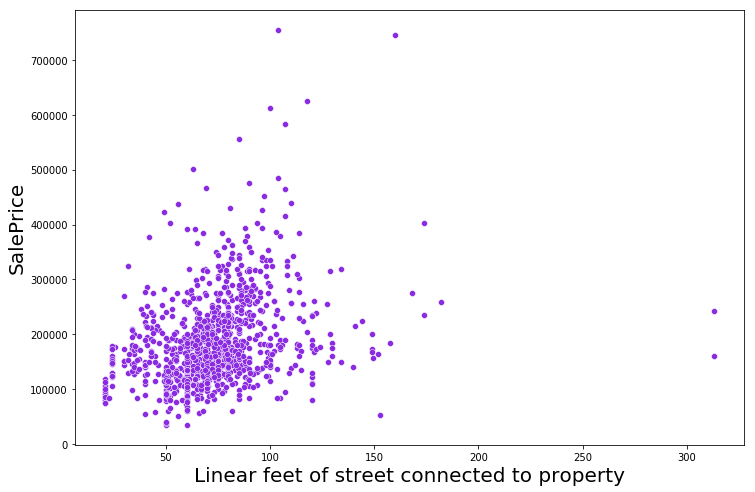

In [43]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LotFrontage',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Linear feet of street connected to property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

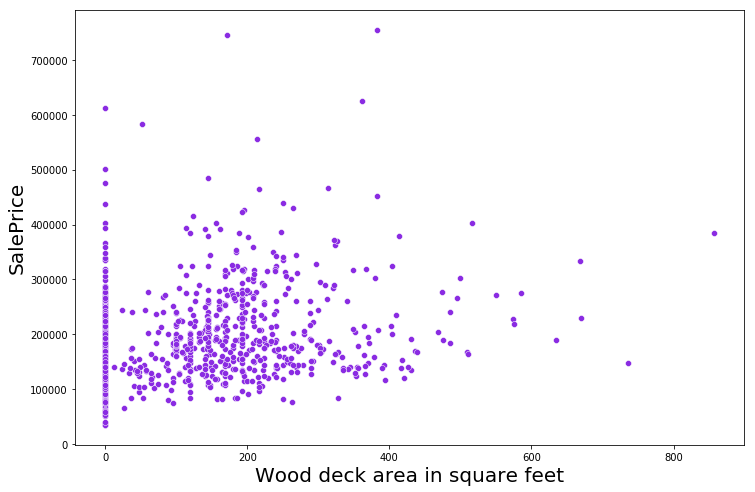

In [44]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'WoodDeckSF',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Wood deck area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

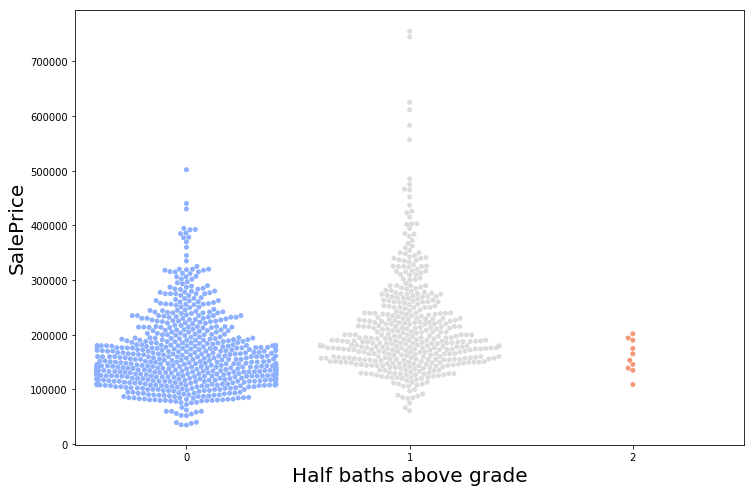

In [45]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'HalfBath',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Half baths above grade', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)


(1900, 2020)

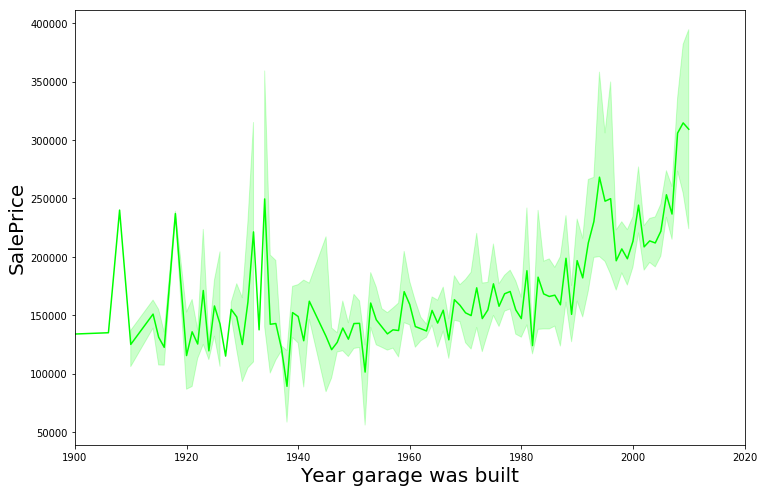

In [46]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'GarageYrBlt',y = 'SalePrice', data = dataset, color = 'lime')
plt.xlabel('Year garage was built', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.xlim([1900,2020])

Text(0, 0.5, 'SalePrice')

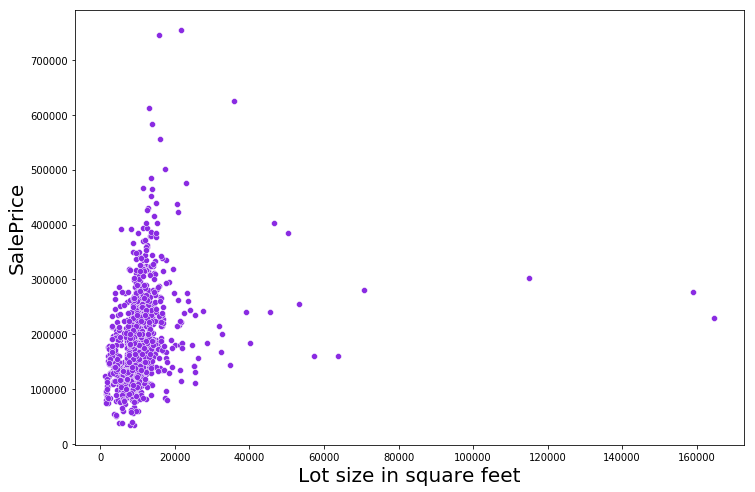

In [47]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LotArea',y = 'SalePrice', data = dataset, color = 'blueviolet')
plt.xlabel('Lot size in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

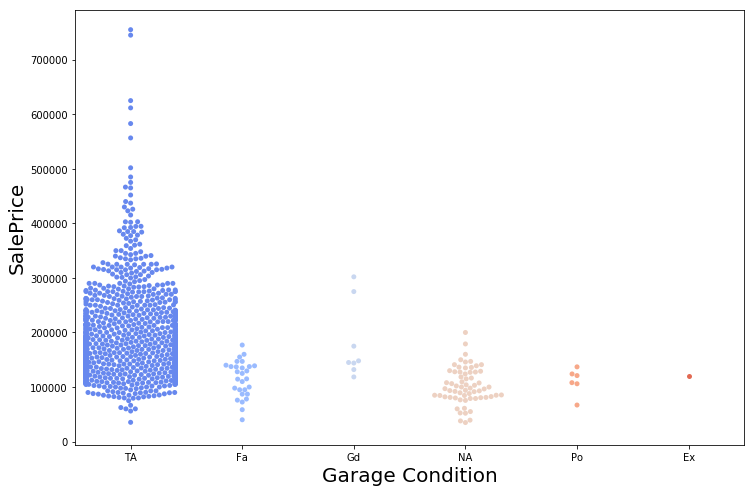

In [48]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageCond',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Garage Condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

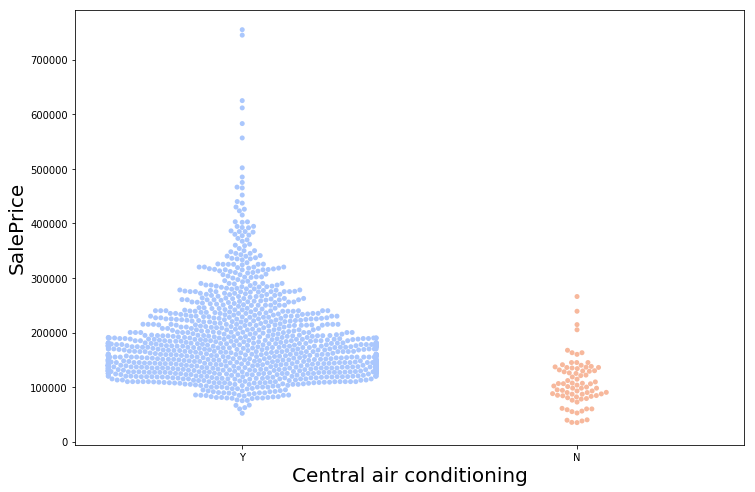

In [49]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'CentralAir',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Central air conditioning', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

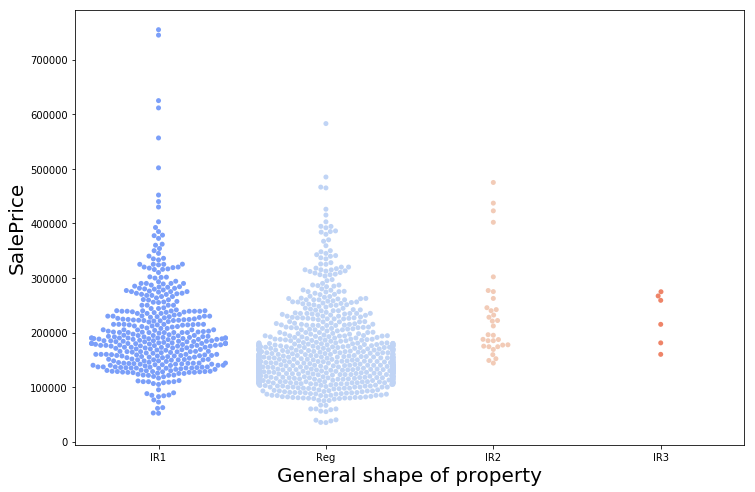

In [50]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'LotShape',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('General shape of property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

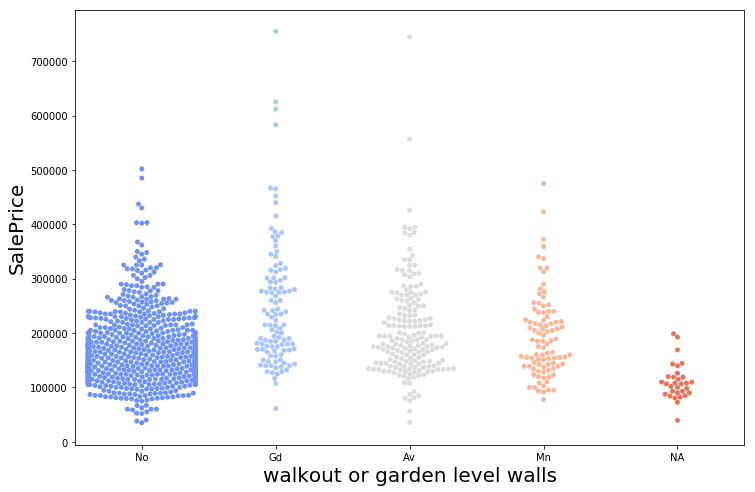

In [51]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'BsmtExposure',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('walkout or garden level walls', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

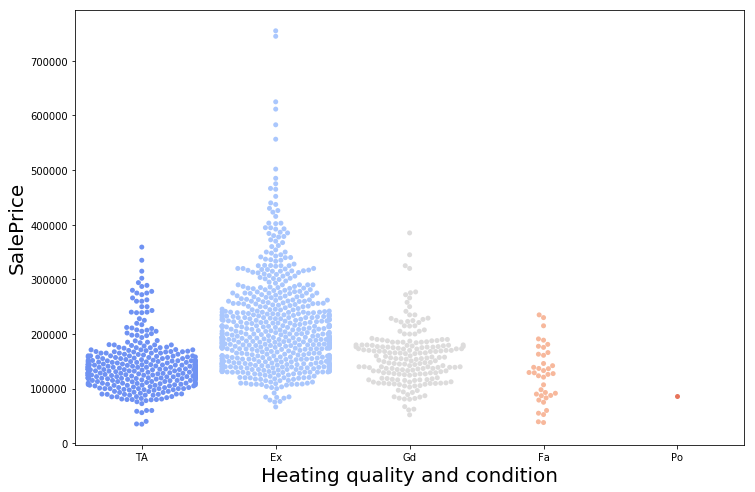

In [52]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'HeatingQC',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Heating quality and condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

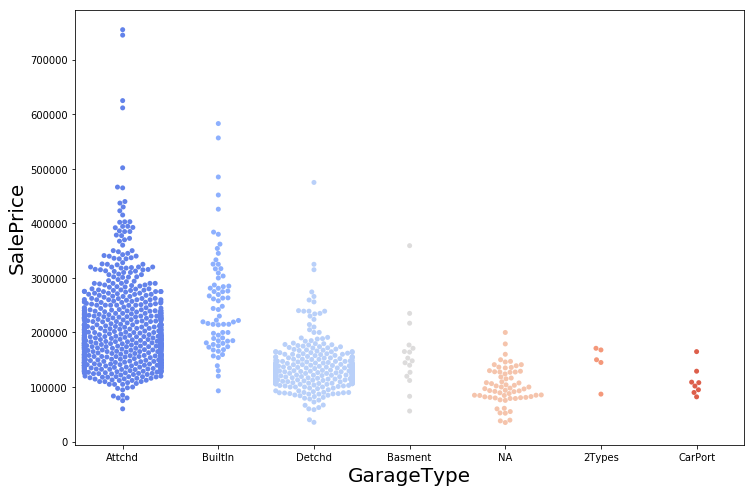

In [53]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageType',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('GarageType', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

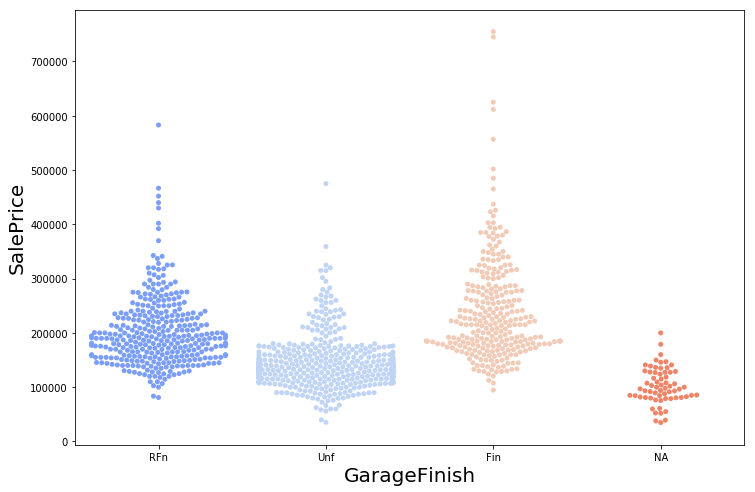

In [54]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageFinish',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('GarageFinish', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

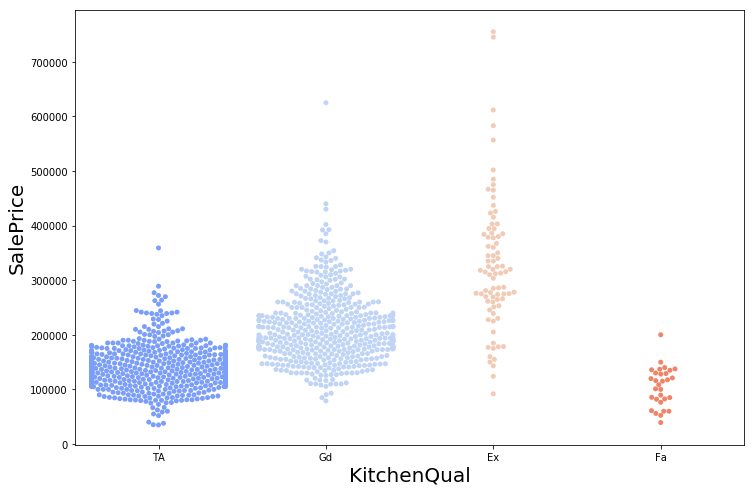

In [55]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'KitchenQual',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('KitchenQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

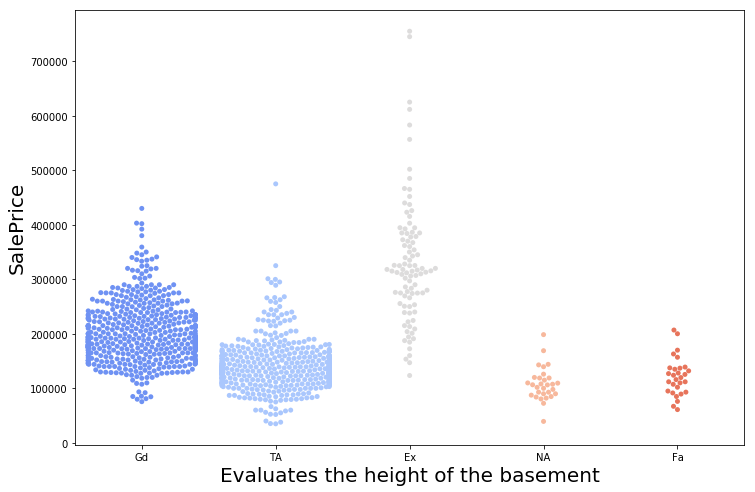

In [56]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'BsmtQual',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Evaluates the height of the basement', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

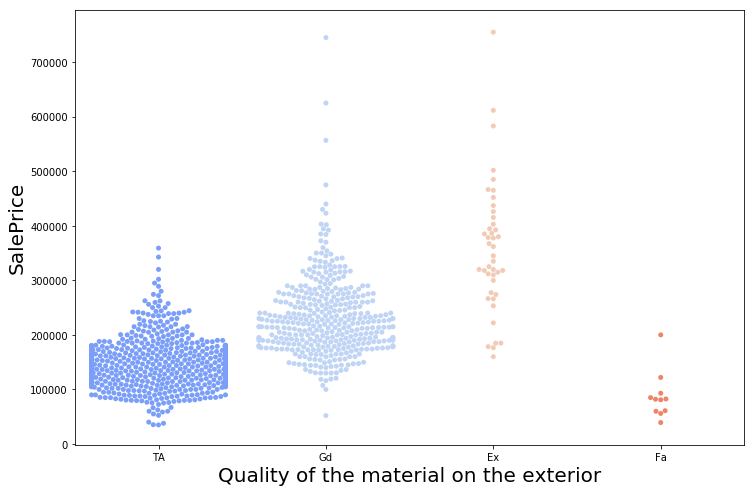

In [57]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'ExterQual',y = 'SalePrice', data = dataset, palette = 'coolwarm')
plt.xlabel('Quality of the material on the exterior', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

### Removing the utilities variable since there was no correlation for the variable at all

In [58]:
data = data.drop(columns = 'Utilities')

### Visualizing the correlation table to view the correlation between target and predictor variable and to find the multi-collinearity issue

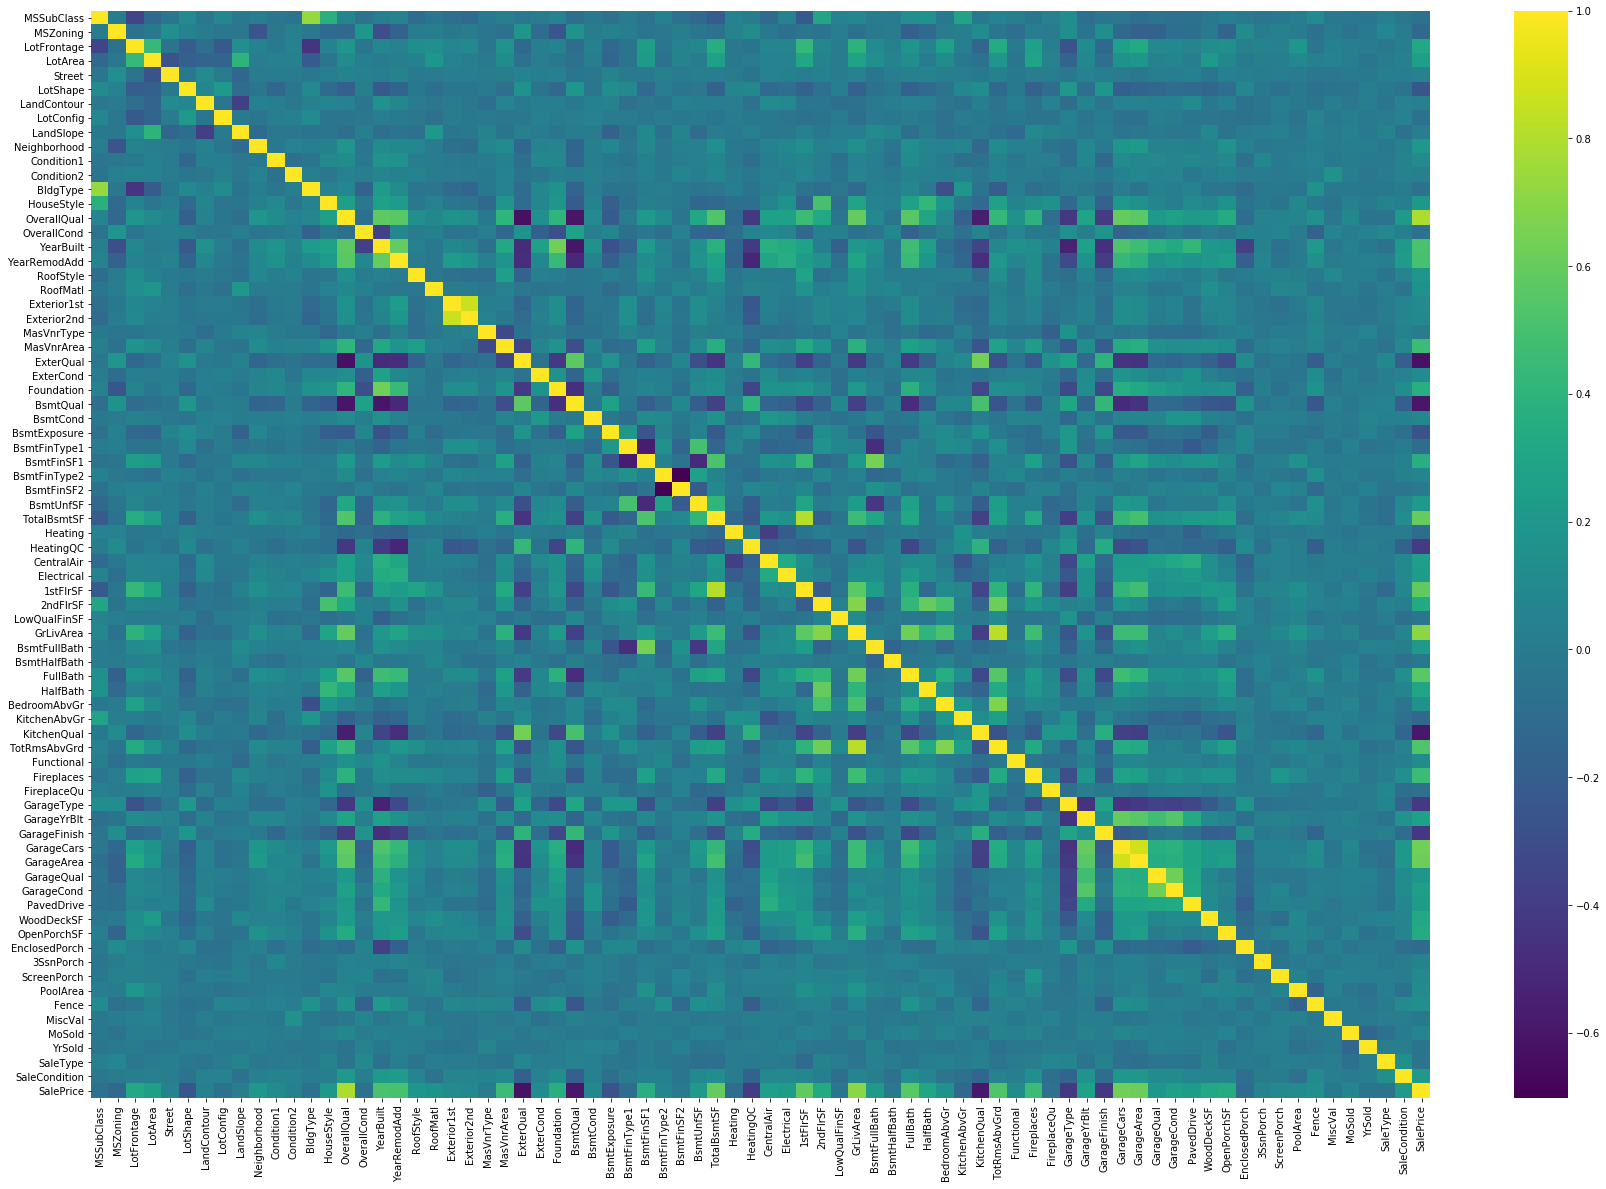

In [59]:
heat = data.corr()
plt.figure(figsize = (30,20))
sns.heatmap(heat, cmap = 'viridis')

###  Visualizing the outliers using the boxplot

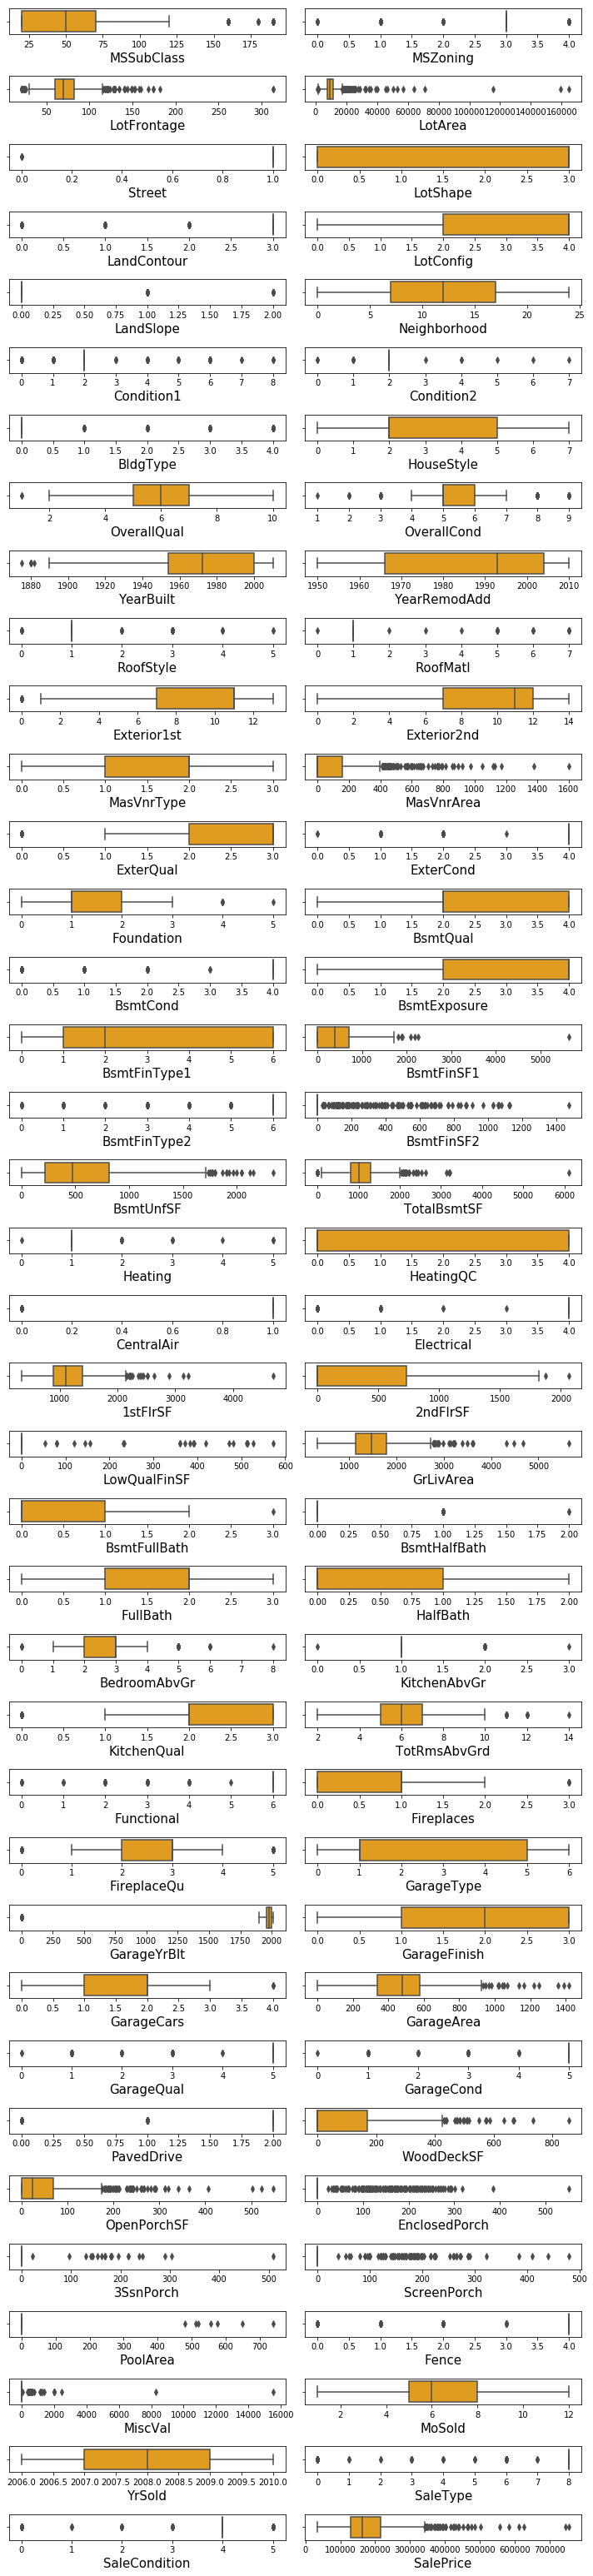

In [60]:
plt.figure(figsize = (10,90))
pltnum = 1
for i in data:
    if pltnum <= 80:
        plt.subplot(80,2, pltnum)
        sns.boxplot(data[i], color = 'orange')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### Considering the values having zscore of more than 3 in the variable as outliers and removing the same

In [61]:
z = np.abs(zscore(data[['LotFrontage','LotArea','MasVnrArea','GarageArea','OpenPorchSF']]))
z.head()

LotFrontage   LotArea  MasVnrArea  GarageArea  OpenPorchSF
0     1.060531  0.620616    0.558343    0.171944     2.387850
1     0.936882  0.600903    0.558343    0.672371     2.417992
2     0.813585  0.063075    0.558343    0.101973     1.257525
3     1.347872  0.141424    2.076985    0.322517     1.136957
4     0.369715  0.686902    0.133430    0.243217     0.701705

In [62]:
new_data = data[(z<3).all(axis = 1)]
print(data.shape)
print(new_data.shape)

(1168, 76)
(1098, 76)


### Checking for data distribution to check for skewness in the continuous variables

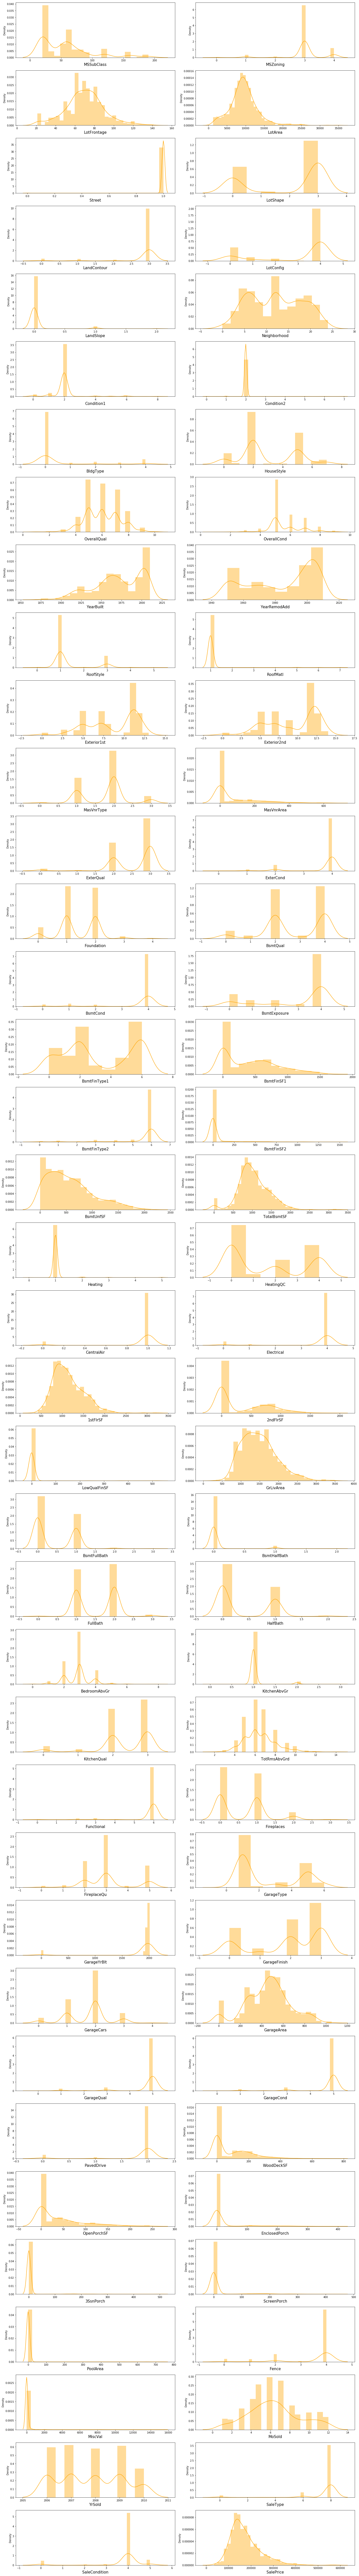

In [63]:
plt.figure(figsize = (20,150))
pltnum = 1
for i in new_data:
    if pltnum <= 80:
        plt.subplot(40,2, pltnum)
        sns.distplot(new_data[i], color = 'orange')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### Splitting the data before treating the skewness

In [64]:
x = new_data.drop(columns = 'SalePrice')
y = new_data['SalePrice']

### Scaling the data before I'm treating the skewness

In [65]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
sc = scal.fit_transform(x)
x = pd.DataFrame(sc, columns = x.columns)

### Checking for skewness in contiuous data variable to find the actual correlation coefficient by making sure that they are in the range of -0.5 to +0.5

In [66]:
x.skew()

MSSubClass        1.395328
MSZoning         -1.729561
LotFrontage       0.130841
LotArea           1.082190
Street          -23.398659
LotShape         -0.663238
LandContour      -3.259926
LotConfig        -1.175147
LandSlope         5.104479
Neighborhood      0.063404
Condition1        3.085421
Condition2       12.551059
BldgType          2.254359
HouseStyle        0.315075
OverallQual       0.049144
OverallCond       0.547251
YearBuilt        -0.552329
YearRemodAdd     -0.463386
RoofStyle         1.635495
RoofMatl          9.780009
Exterior1st      -0.600008
Exterior2nd      -0.584912
MasVnrType       -0.127010
MasVnrArea        1.703586
ExterQual        -1.782015
ExterCond        -2.512786
Foundation       -0.070819
BsmtQual         -0.491204
BsmtCond         -2.768230
BsmtExposure     -1.029403
BsmtFinType1      0.078869
BsmtFinSF1        0.652761
BsmtFinType2     -3.164408
BsmtFinSF2        4.414477
BsmtUnfSF         0.845743
TotalBsmtSF       0.381230
Heating          10.486758
H

### using power transformation technique to treat the skewness in the data

In [67]:
tr = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr, columns = x.columns)

### Most of the continuous variable's skewness is controlled

In [68]:
x.skew()

MSSubClass        0.221887
MSZoning          0.032840
LotFrontage       0.018485
LotArea           0.008158
Street          -23.398659
LotShape         -0.639342
LandContour      -2.771882
LotConfig        -1.047930
LandSlope         4.316133
Neighborhood      0.009453
Condition1       -0.488883
Condition2       -1.326000
BldgType          1.811786
HouseStyle       -0.021076
OverallQual      -0.041239
OverallCond      -0.292863
YearBuilt        -0.119437
YearRemodAdd     -0.184431
RoofStyle        -0.969075
RoofMatl          9.038621
Exterior1st      -0.185874
Exterior2nd      -0.190573
MasVnrType        0.165466
MasVnrArea        0.681389
ExterQual        -0.578356
ExterCond        -2.286746
Foundation        0.022249
BsmtQual         -0.182205
BsmtCond         -2.463674
BsmtExposure     -0.736718
BsmtFinType1      0.004043
BsmtFinSF1        0.174261
BsmtFinType2     -2.054602
BsmtFinSF2        2.434390
BsmtUnfSF         0.097727
TotalBsmtSF      -0.063782
Heating          -9.508290
H

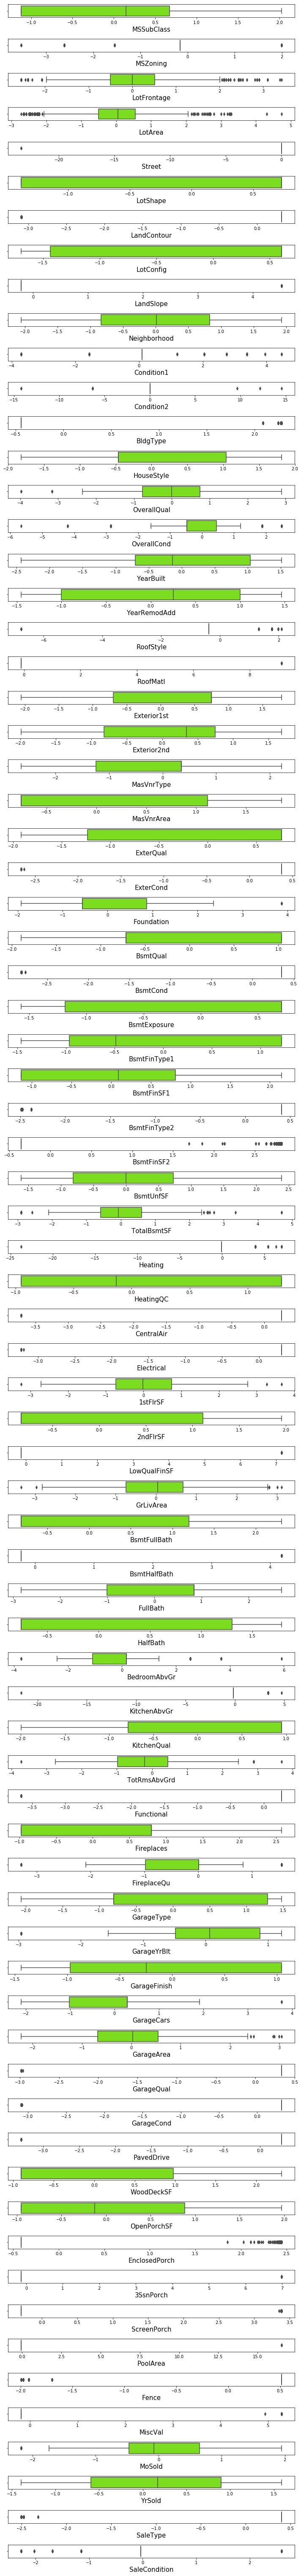

In [69]:
plt.figure(figsize = (10,90))
pltnum = 1
for i in x:
    if pltnum <= 80:
        plt.subplot(80,1, pltnum)
        sns.boxplot(x[i], color = 'lawngreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

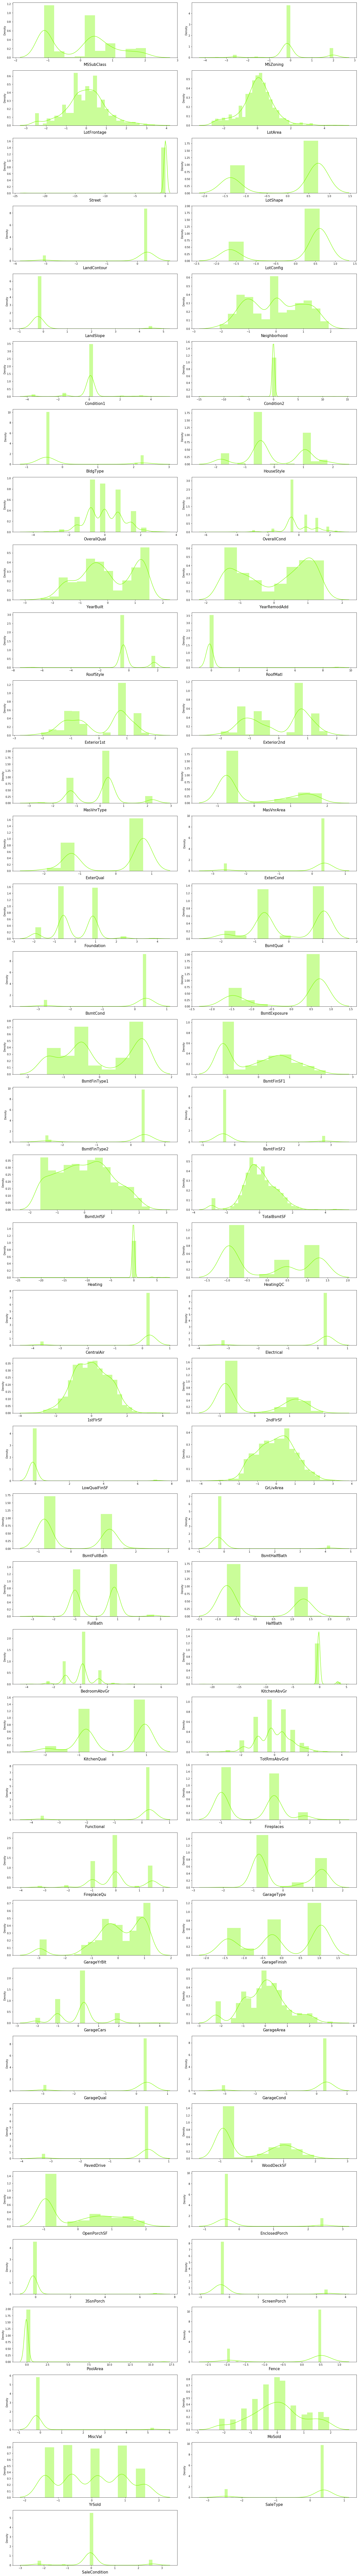

In [70]:
plt.figure(figsize = (20,150))
pltnum = 1
for i in x:
    if pltnum <= 80:
        plt.subplot(40,2, pltnum)
        sns.distplot(x[i], color = 'lawngreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### I can see that the outliers are under control for most of the variable, However the variables 'MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2' and 'Exterior2nd' has lot of outliers and will not be helpful in the price prediction

In [72]:
x = x.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2','Exterior2nd'])

### Checking for the best random state to control the over fitting before even building the model

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
rs = 0
for i in range(0,3000):
    x_train,x_val, y_train,y_val = train_test_split(x,y,test_size = 0.3, random_state = i)
    lg = LinearRegression()
    lg.fit(x_train,y_train)
    val_pred = lg.predict(x_val)
    tr_score = lg.score(x_train,y_train)
    val_score = lg.score(x_val,y_val)
    if round(tr_score*100,1)==round(val_score*100,1):
        if i>rs:
            rs = i
print('the best random state for the data set is', rs)

the best random state for the data set is 2744


### Splitting the dataset with the best random state

In [74]:
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size = 0.3, random_state = rs)

### Model 1: Linear Regression

In [75]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_val)
lin_score = lin.score(x_val,y_val)
lin_score

0.8758945634569286

In [91]:
lin_rmse = mean_absolute_error(y_val, lin_pred)
print('The recoreded mean absolute error for the Linear Regression is: ', lin_rmse)

The recoreded root mean absolute error for the Linear Regression is:  16863.62382546969


### Model 2: Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr  = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_val)
rfr_score = rfr.score(x_val,y_val)
rfr_score

0.8931618363914138

In [92]:
rfr_rmse = mean_absolute_error(y_val, rfr_pred)
print('The recoreded mean absolute error for the Random Forest Regression is: ', rfr_rmse)

The recoreded root mean absolute error for the Random Forest Regression is:  14959.242303030303


### Model 3: Extra Trees Regressor

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
et  = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_val)
et_score = et.score(x_val,y_val)
et_score

0.8803535406846894

In [93]:
et_rmse = mean_absolute_error(y_val, et_pred)
print('The recoreded  mean absolute error for the ExtraTrees Regression is: ', et_rmse)

The recoreded root mean absolute error for the ExtraTrees Regression is:  14911.914333333334


### Model 4: Ridge Regression

In [85]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [86]:
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [88]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [90]:
ridge_reg.score(x_val, y_val)

0.8759152195629079

In [95]:
rid_pred = ridge_reg.predict(x_val)

In [96]:
rid_mae = mean_absolute_error(y_val, rid_pred)
print('The recoreded mean absolute error for the Ridge Regression is: ', rid_mae)

The recoreded mean absolute error for the Ridge Regression is:  16861.681447121322


### Model 5: XGB Regressor

In [98]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train,y_train)
xg_pred = xg.predict(x_val)
xg_score = xg.score(x_val,y_val)
xg_score

0.8691153864127427

In [99]:
xg_mae = mean_absolute_error(y_val, xg_pred)
print('The recoreded mean absolute error for the XG Boost Regressor is: ', xg_mae)

The recoreded mean absolute error for the XG Boost Regressor is:  16416.311576704546


### Cross validation scores of the model to identify the best model

In [103]:
cv = cross_val_score(lin,x,y,scoring ='r2', cv = 5)
cv =cv.mean()
cv

0.8508168665375377

In [104]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2', cv = 5)
cv1 =cv1.mean()
cv1

0.8517103023510184

In [105]:
cv2 = cross_val_score(et,x,y,scoring ='r2', cv = 5)
cv2 =cv2.mean()
cv2

0.8483706516988508

In [106]:
cv3 = cross_val_score(ridge_reg,x,y,scoring ='r2', cv = 5)
cv3 =cv3.mean()
cv3

0.8508419726849377

In [107]:
cv4 = cross_val_score(xg,x,y,scoring ='r2', cv = 5)
cv4 =cv4.mean()
cv4

0.8412766241398156

### Model Selection

In [108]:
model = [lin_score,rfr_score,et_score,rid_pred,xg_score]
cv = [cv,cv1,cv2,cv3,cv4]
model_sel = pd.DataFrame({})
model_sel['model'] = model
model_sel['cv'] = cv
model_sel['difference'] = model_sel['model'] - model_sel['cv']
model_sel

model        cv  \
0                                           0.875895  0.850817   
1                                           0.893162  0.851710   
2                                           0.880354  0.848371   
3  [150102.65875060426, 79503.52708491248, 121639...  0.850842   
4                                           0.869115  0.841277   

                                          difference  
0                                           0.025078  
1                                           0.041452  
2                                           0.031983  
3  [150101.80790863157, 79502.6762429398, 121638....  
4                                           0.027839

### Hyper Parameter Tuning on Random Forest Regressor, because its giving me the best R2 score

In [115]:
params ={'n_estimators':[100,200,300,400],
        'max_depth':[13,15,17,19],
        'min_samples_split':[3,4,5,6],
        'criterion':['mse','mae']}

In [116]:
gcv = GridSearchCV(RandomForestRegressor(), params, cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [13, 15, 17, 19],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [117]:
gcv.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'min_samples_split': 3,
 'n_estimators': 100}

In [118]:
fin = RandomForestRegressor(criterion = 'mae',max_depth = 15, min_samples_split = 3, n_estimators = 100)
fin.fit(x_train,y_train)
fin_pred = fin.predict(x_val)
fin_score = fin.score(x_val,y_val)
fin_score

0.8832173043391425

In [119]:
fin_mae = mean_absolute_error(y_val,fin_pred)
print("The mean absolute error for the final model is ", fin_mae)

The mean absolute error for the final model is  15534.975681818181


### Visualizing the basic Random Forest Model and the Hyper Tuned Random Forest Model

Text(0, 0.5, 'Actual Score')

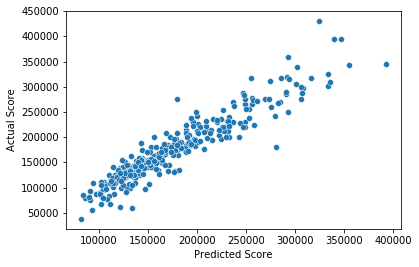

In [121]:
sns.scatterplot(x = fin_pred, y = y_val)
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

Text(0, 0.5, 'Actual Score')

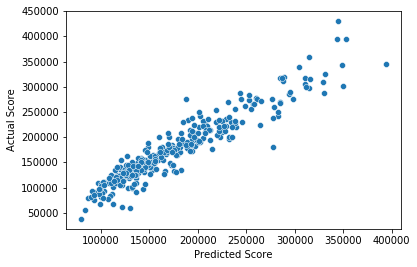

In [140]:
sns.scatterplot(x = rfr_pred, y = y_val)
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

### I can see that the basic Random Forest Model is performing little better than the Hyper tuned model in terms of the mean absolute error

### Predicting the values using the trained model for the test dataset. Further, we are using the same pre-processing steps as before

In [122]:
test_data = pd.read_csv(r'C:\Users\LENOVO\Documents\Untitled Folder\Project-Housing_splitted\test.csv')

In [123]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [124]:
test_data = test_data.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2',
                                      'Exterior2nd','Alley','MiscFeature','PoolQC','Id'])

In [127]:
test_data[['LotFrontage','LotArea']] = knim.fit_transform(test_data[['LotFrontage','LotArea']])
test_data['MasVnrType'] = test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')

In [129]:
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [130]:
encoder = OrdinalEncoder()
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = encoder.fit_transform(test_data[i].values.reshape(-1,1))

In [131]:
z = np.abs(zscore(test_data[['LotFrontage','LotArea','MasVnrArea','GarageArea','OpenPorchSF']]))
z.head()

LotFrontage   LotArea  MasVnrArea  GarageArea  OpenPorchSF
0     0.913244  0.263894    0.522510    1.038573     0.059897
1     0.485245  0.363030    0.623319    0.511068     0.715738
2     0.686462  0.089636    0.623319    0.306719     1.580750
3     0.393535  0.101809    0.623319    1.061944     0.715738
4     0.913244  0.297033    0.199362    1.000555     0.441985

In [132]:
test_new = test_data[(z<3).all(axis = 1)]
print(test_data.shape)
print(test_new.shape)

(292, 69)
(275, 69)


In [134]:
scal = StandardScaler()
sc = scal.fit_transform(test_new)
test_new = pd.DataFrame(sc, columns = test_new.columns)

In [135]:
tr = power_transform(test_new, method = 'yeo-johnson')
test_new = pd.DataFrame(tr, columns = test_new.columns)

In [137]:
test_new = test_new.drop(columns = 'Utilities')

In [141]:
predicted_data = rfr.predict(test_new)

### Saving the best model

In [142]:
import joblib
joblib.dump(fin,'RealEstatePrediction.pkl')

['RealEstatePrediction.pkl']